In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt

## The chemical potential of fermions ##

The chemical potential is the change in Helmholtz free energy when a particle is added to the system.

For fermions, $\mu$ ___does not have to be positive___.
This is not true for bosons since for $\mu < 0$, the distribution function would increase with $N$.

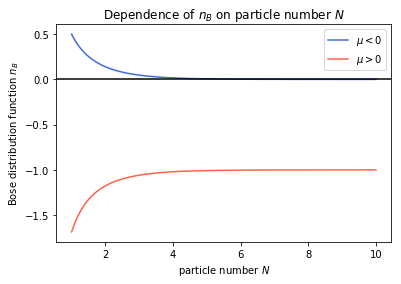

In [3]:
# Plotting script
ngrid = np.linspace(1,10,100)

def bose(w,beta,mu,n):
    return 1. / (np.exp(beta * (w - mu * n)) - 1)

w = 0.1
beta = 1

plt.title(r"Dependence of $n_B$ on particle number $N$")
plt.ylabel(r"Bose distribution function $n_B$")
plt.xlabel(r"particle number $N$")
plt.plot(ngrid,bose(w,beta,-1,ngrid),c='royalblue',label=r'$\mu < 0$')
plt.plot(ngrid,bose(w,beta,+1,ngrid),c='tomato',label=r'$\mu > 0$')
plt.axhline(0, color='black')
plt.legend()
plt.show()

The boss had the idea of studying the dependece of the chemical potential $\mu$ in a $3D$ electron gas with fixed average particle number $\langle N \rangle$.

This is obtained by integrating the density of states with the Fermi-Dirac distribution function

$\langle n \rangle = \int \text{d}\omega \; n_F (\omega)\; DOS(\omega)$

By increasing beta, the distribution function would broaden, which would imply the chemical potential needs to be lowered such that the average particle number is conserved

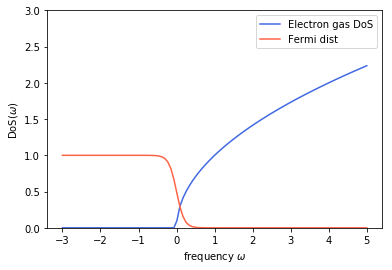

In [4]:
# 3D electron gas

def dos(w):
    return np.sqrt(w) if w > 0 else 0

def fermi(w,beta,mu):
    return 1./(np.exp(beta*(w - mu)) + 1)

wgrid = np.linspace(-3,5,102)

plt.ylabel(r"DoS$(\omega)$")
plt.xlabel(r"frequency $\omega$")
plt.plot(wgrid,list(map(dos,wgrid)),color='royalblue',label=r"Electron gas DoS")
plt.plot(wgrid,fermi(wgrid,10,0),color='tomato',label=r"Fermi dist")
plt.ylim(0,3)
plt.legend()
plt.show()

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


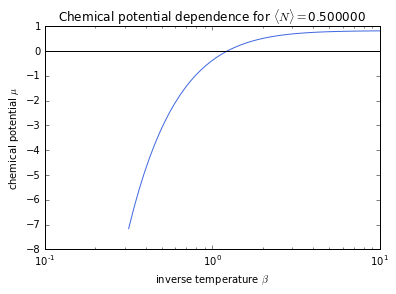

In [109]:
# Functions
from scipy.integrate import quad as integrate
from scipy.optimize import fsolve

# bound = -np.inf
bound = 100

# average value
def average(beta,mu):
    return integrate(lambda w: dos(w) * fermi(w,beta,mu), -bound, bound)[0]

# returns chemical potential that satisfies <n> = a at T^{-1} = \beta
def chem_pot(beta, a):
    return fsolve(lambda mu: average(beta,mu) - a, 0)[0]

grid = np.logspace(-0.5,1,50)
averageN = 0.5

plt.title(r"Chemical potential dependence for $\langle N \rangle =$%f"%averageN)
plt.ylabel(r"chemical potential $\mu$")
plt.xlabel(r"inverse temperature $\beta$")
plt.plot(grid,[chem_pot(b,averageN) for b in grid],color='royalblue')
plt.axhline(0, color='black')
plt.xscale('log')
plt.show()